# Intrinsic Dimension Estimation
This follows the example in section 3.4.1 of Lee and Verleysen

In a three dimensional cube $[-1,1]^3$, 10 distance sensors are placed at random locations. The position of any data point in the cube can be encoded as a 10-vector containing the distance to each sensor.

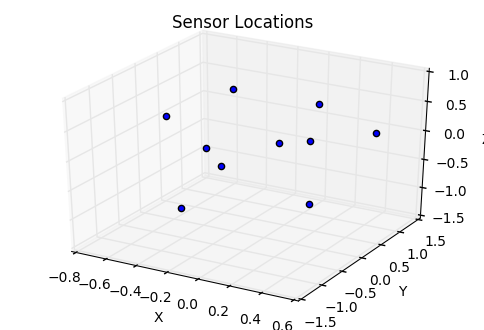

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#create sensors
#sensorLoc=np.random.uniform(low=-1.0,high=1.0,size=(10,3))
sensorLoc=[[0.026,0.241,0.026],[0.236,0.193,-0.913],[-.653,.969,-.700],
          [0.310,0.094,0.876],[0.507,0.756,0.216],[-0.270,-0.978,-0.739],
          [-0.466,-0.574,0.556],[-0.140,-0.502,-0.155],[0.353,-0.281,0.431],
          [-0.473,0.993,0.411]]

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

for sensor in sensorLoc:
    ax.scatter(sensor[0],sensor[1],sensor[2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sensor Locations')
    
plt.show()

We create three datasets with 100, 1000 and 10000 observations uniformly distributed in the cube.

In [21]:
obs1=np.random.uniform(low=-1.0,high=1.0,size=(100,3))
obs2=np.random.uniform(low=-1.0,high=1.0,size=(1000,3))
obs3=np.random.uniform(low=-1.0,high=1.0,size=(10000,3))

Calculate the distance to the sensors to create 10D 'coordinate' vectors. Add white Gaussian noise with standard deviation 0.01.

In [22]:
def dist(x,y): 
    return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2+(x[2]-y[2])**2)

In [23]:
obs1_10D=np.zeros((len(obs1),10))
for j in range(len(obs1)):
    for i in range(len(sensorLoc)):
        obs1_10D[j][i]=dist(obs1[i],sensorLoc[i])
    obs1_10D[j]=obs1_10D[j]+np.random.normal(0,.01,10)
obs1_10D=obs1_10D.T
    
obs2_10D=np.zeros((len(obs2),10))
for j in range(len(obs2)):
    for i in range(len(sensorLoc)):
        obs2_10D[j][i]=dist(obs1[i],sensorLoc[i])
    obs2_10D[j]=obs2_10D[j]+np.random.normal(0,.01,10)
    
obs3_10D=np.zeros((len(obs3),10))
for j in range(len(obs3)):
    for i in range(len(sensorLoc)):
        obs3_10D[j][i]=dist(obs3[i],sensorLoc[i])
    obs3_10D[j]=obs3_10D[j]+np.random.normal(0,.01,10)

These coordinates will be interdependent in nonlinear ways. Obviously, the intrinsic dimension is 3. Next, we will explore different ways of estimating the intrinsic dimension.

## Principal component analysis

In [24]:
from sklearn.decomposition import PCA
import pandas as pd

pca=PCA(n_components=10, whiten=True)
pca.fit(obs1_10D)
obs1_pca=pca.transform(obs1_10D)
print('original shape', obs1_10D.shape)
print('transformed shape', obs1_pca.shape)
obs1_new=pca.inverse_transform(obs1_pca)
print('new shape', obs1_new.shape)

original shape (10, 100)
transformed shape (10, 10)
new shape (10, 100)


In [29]:
var=pca.explained_variance_
var_norm=np.linalg.norm(var)
var/var[0]


array([1.00000000e+00, 1.38143095e-04, 1.09620132e-04, 9.61854860e-05,
       8.04088288e-05, 7.20380286e-05, 6.82323450e-05, 5.71272813e-05,
       5.04152627e-05, 1.14623650e-31])